In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [6]:
Degree = 2 # degree
Height = 2 # Height of the tree

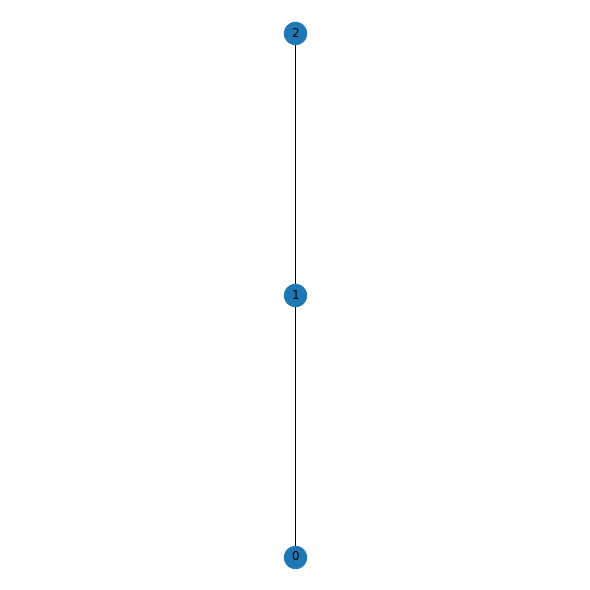

[[0, 1]]


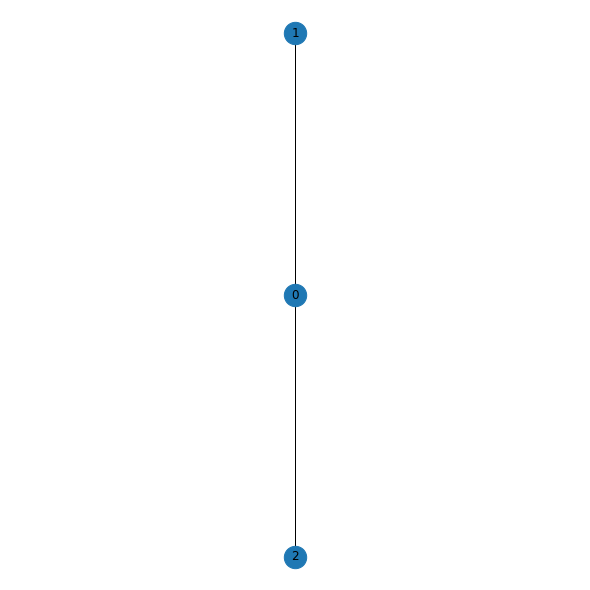

In [8]:
import imp 

import graph_gen
imp.reload(graph_gen)
N, J_interaction = graph_gen.tree_interaction(Degree,Height)

#H = np.random.random(N)
H = np.zeros(N)

num_swap = 1
swaps = []
nodes = list(range(N))
for n in range(num_swap):
    ss_temp = random.sample(nodes, 2)
    swaps.append(ss_temp)
    #print(ss_temp)
    nodes.remove(ss_temp[0])
    nodes.remove(ss_temp[1])
    
print(swaps)

J_interaction_rand = J_interaction.copy()
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    J_interaction_rand[w] = J_interaction_rand[rev] 
    J_interaction_rand[:,w] = J_interaction_rand[:,rev] 
    H_rand[w] = H_rand[rev]
J_interaction_rand
graph_gen.plot_matrix_graph(J_interaction_rand)

betas = np.arange(1e-6,2,1e-2)
betas_fast =np.arange(1e-6,2,2e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [9]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -6.67e-07 M: 1.85e-17 S: 0.693
beta: 0.2, Fe: -3.532 Energy: -0.132 M: 0.0 S: 0.68
beta: 0.4, Fe: -1.863 Energy: -0.253 M: 3.17e-17 S: 0.644
beta: 0.6, Fe: -1.344 Energy: -0.358 M: 0.0 S: 0.592
beta: 0.8, Fe: -1.109 Energy: -0.443 M: 4.14e-17 S: 0.533
beta: 1.0, Fe: -0.982 Energy: -0.508 M: 0.0 S: 0.475
beta: 1.2, Fe: -0.907 Energy: -0.556 M: 0.0 S: 0.422
beta: 1.4, Fe: -0.860 Energy: -0.59 M: 0.0 S: 0.377
beta: 1.6, Fe: -0.828 Energy: -0.614 M: 0.0 S: 0.341
beta: 1.8, Fe: -0.805 Energy: -0.631 M: 0.0 S: 0.313


In [10]:
res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.183 std_fe: 2.90E-02 M: 0.011 S: 0.693 E: 0.003 -0.0187, W: 2.03923e-06, -0.0, Bias: -0.000000 - -0.00000000021
fe: -3.532 std_fe: 6.25E-05 M: 0.003 S: 0.678 E: -0.143 0.0193, W: 0.399948, -0.0, Bias: 0.000018 - 0.0000122404
fe: -1.863 std_fe: 4.44E-05 M: -0.001 S: 0.639 E: -0.2650.0173, W: 0.799978, -0.0, Bias: -0.000056 - 0.000056390
fe: -1.344 std_fe: 7.65E-05 M: 0.017 S: 0.596 E: -0.351 -0.00867, W: 1.20004, -0.0, Bias: -0.000181 - -0.000121
fe: -1.109 std_fe: 5.67E-05 M: -0.003 S: 0.537 E: -0.4370.0147, W: 1.60013, -0.0, Bias: -0.000061 - 0.00017851
fe: -0.982 std_fe: 7.99E-05 M: -0.019 S: 0.481 E: -0.5010.000667, W: 2.00047, -0.0, Bias: 0.000160 - 0.0000940
fe: -0.907 std_fe: 8.13E-05 M: 0.005 S: 0.430 E: -0.549 0.00667, W: 2.40079, -0.0, Bias: 0.000062 - -0.00011543
fe: -0.860 std_fe: 9.09E-05 M: 0.001 S: 0.383 E: -0.586 -0.056, W: 2.80107, -0.0, Bias: -0.000108 - -0.0002543
fe: -0.828 std_fe: 8.76E-05 M: 0.005 S: 0.350 E: -0.609 0.002, W: 3.20182, -0.0, Bias: 0.0000

In [21]:
import bp_nn
imp.reload(bp_nn)
import solvers
imp.reload(solvers)
res_nn_norm = solvers.nn_sol_normed(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_norm["name"]="nn_norm"

tensor([150,  76, 127, 155, 201,  89,  87, 115]) tensor([0.1500, 0.0760, 0.1270, 0.1550, 0.2010, 0.0890, 0.0870, 0.1150],
       dtype=torch.float64)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [114]:
res_nn_rand = solvers.nn_sol(tree_rand, betas_fast, max_step=1000, bias = True, batch_size=10000,
                        z2 = False, x_hat_clip = False)
res_nn_rand["name"]="nn_rand"

res_nn_rand_n = solvers.nn_sol_normed(tree_rand, betas_fast, max_step=1000, bias = True, batch_size=10000,
                        z2 = False, x_hat_clip = False)
res_nn_rand_n["name"]="nn_rand_n"


fe: -693147.186 std_fe: 6.55E-02 M: -0.003 S: 0.693 E: -0.001-0.00574, W: 0.0, 1.8842e-06, Bias: 0.000000 - -0.00000000025
fe: -3.557 std_fe: 2.54E-02 M: 0.004 S: 0.674 E: -0.186: 0.00249, W: 0.0, 0.399942, Bias: 0.002504 - 0.001027388
fe: -1.908 std_fe: 4.35E-02 M: 0.003 S: 0.630 E: -0.334: 0.00448, W: 0.0, 0.798396, Bias: 0.007792 - 0.004705960
fe: -1.405 std_fe: 5.41E-02 M: -0.006 S: 0.568 E: -0.459 0.00532, W: 0.0, 1.20292, Bias: 0.000821 - 0.002654147
fe: -1.182 std_fe: 6.02E-02 M: 0.002 S: 0.499 E: -0.558: 0.00795, W: 0.0, 1.59636, Bias: 0.011767 - 0.018189522
fe: -1.065 std_fe: 6.36E-02 M: 0.002 S: 0.434 E: -0.631: 0.00348, W: 0.0, 2.00705, Bias: -0.004366 - -0.0047679
fe: -0.999 std_fe: 4.26E-02 M: 0.505 S: 0.326 E: -0.728: 0.513, W: 0.0, 2.40819, Bias: 1.390148 - 1.3814433
fe: -0.966 std_fe: 2.54E-02 M: 0.709 S: 0.232 E: -0.800: 0.715, W: 0.0, 2.82071, Bias: 2.177566 - 2.180305
fe: -0.948 std_fe: 1.51E-02 M: 0.818 S: 0.167 E: -0.844: 0.818, W: 0.0, 3.2069, Bias: 2.807564 - 2.8

KeyboardInterrupt: 

In [91]:
res_nn_rand_n = solvers.nn_sol_normed(tree_rand, betas_fast, max_step=1000, bias = True, batch_size=10000,
                        z2 = False, x_hat_clip = False)
res_nn_rand_n["name"]="nn_rand_n"

fe: -693147.199 std_fe: 4.39E-02 M: -0.004 S: 0.693 E: -0.004 0.00746, W: 0.0, -0.0, Bias: -0.000000 - -0.000000057
fe: -3.557 std_fe: 3.12E-02 M: 0.007 S: 0.675 E: -0.182: 0.00566, W: 0.0, -0.0, Bias: 0.000008 - 0.000324091
fe: -1.905 std_fe: 5.71E-02 M: -0.000 S: 0.626 E: -0.340 -0.00474, W: 0.0, -0.0, Bias: -0.004981 - 0.0008747
fe: -1.390 std_fe: 6.93E-02 M: -0.114 S: 0.558 E: -0.460 -0.111, W: 0.0, -0.0, Bias: -0.285841 - -0.403894
 0.80 62 fe: -1.172 +- 0.06940 E: -0.551, S: 0.486, M: -0.35, W: 0.0, -0.0, Bias: -0.733948 - -0.9468176

KeyboardInterrupt: 

In [9]:
res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.977, ener: -0.092, M: 0.000, iter 1
fe: -3.557, ener: -0.182, M: 0.000, iter 1
fe: -2.447, ener: -0.269, M: 0.000, iter 1
fe: -1.913, ener: -0.351, M: 0.000, iter 1
fe: -1.608, ener: -0.427, M: 0.000, iter 1
fe: -1.417, ener: -0.496, M: 0.000, iter 1
fe: -1.290, ener: -0.558, M: 0.000, iter 1
fe: -1.202, ener: -0.613, M: 0.000, iter 1
fe: -1.139, ener: -0.661, M: 0.000, iter 1
fe: -1.094, ener: -0.703, M: 0.000, iter 1
fe: -1.060, ener: -0.739, M: 0.000, iter 1
fe: -1.034, ener: -0.770, M: 0.000, iter 1
fe: -1.015, ener: -0.795, M: 0.000, iter 1
fe: -1.000, ener: -0.817, M: 0.000, iter 1
fe: -0.989, ener: -0.836, M: 0.000, iter 1
fe: -0.979, ener: -0.851, M: 0.000, iter 1
fe: -0.972, ener: -0.863, M: 0.000, iter 1
fe: -0.967, ener: -0.874, M: 0.000, iter 1
fe: -0.962, ener: -0.883, M: 0.000, iter 1


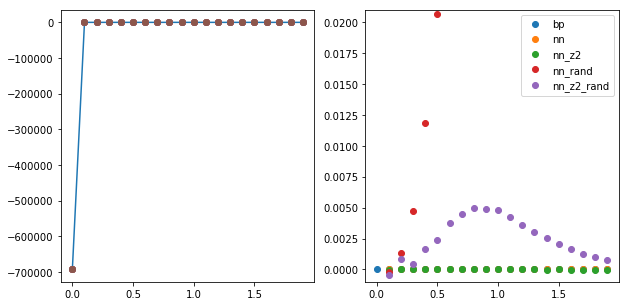

In [10]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2,
                                          res_nn_rand, res_nn_z2_rand])
plt.ylim(-0.001,0.021)
plt.show()

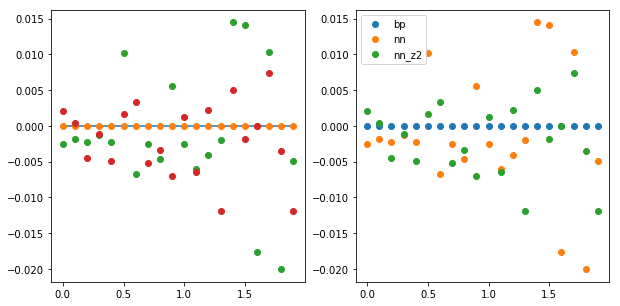

In [11]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

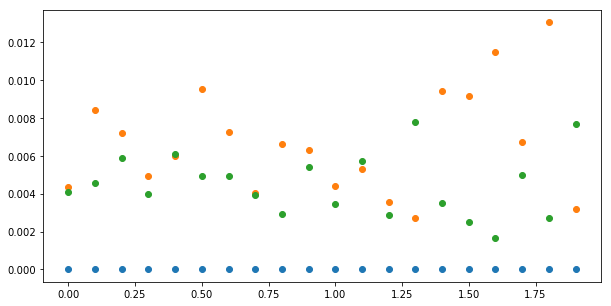

In [12]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

# With random field

In [6]:
H = np.random.random(N)
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    H_rand[w] = H_rand[rev]


In [7]:
H_rand

array([0.3948683 , 0.45208333, 0.50844868, 0.57703423, 0.38360935,
       0.89949321, 0.20015542, 0.46194275, 0.31244523, 0.72907781,
       0.47399093, 0.33879398, 0.92341795])

In [8]:
H

array([0.3948683 , 0.45208333, 0.47399093, 0.20015542, 0.92341795,
       0.72907781, 0.57703423, 0.46194275, 0.31244523, 0.89949321,
       0.50844868, 0.33879398, 0.38360935])

In [9]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)

res_ex = solvers.exact_sol(tree, betas_fast)

res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"
res_nn_rand = solvers.nn_sol(tree_rand, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_rand["name"]="nn_rand"

res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

beta: 0.0, Fe: -693147.181 Energy: -1.23e-06 M: 5.12e-07 S: 0.693
beta: 0.1, Fe: -6.995 Energy: -0.13 M: 0.0611 S: 0.687
beta: 0.2, Fe: -3.599 Energy: -0.281 M: 0.149 S: 0.664
beta: 0.3, Fe: -2.522 Energy: -0.459 M: 0.27 S: 0.6198
beta: 0.4, Fe: -2.031 Energy: -0.66 M: 0.419 S: 0.5483
beta: 0.5, Fe: -1.777 Energy: -0.858 M: 0.571 S: 0.459
beta: 0.6, Fe: -1.638 Energy: -1.02 M: 0.698 S: 0.3684
beta: 0.7, Fe: -1.560 Energy: -1.15 M: 0.791 S: 0.2890
beta: 0.8, Fe: -1.514 Energy: -1.23 M: 0.854 S: 0.2251
beta: 0.9, Fe: -1.486 Energy: -1.29 M: 0.897 S: 0.1764
beta: 1.0, Fe: -1.469 Energy: -1.33 M: 0.926 S: 0.1370
beta: 1.1, Fe: -1.458 Energy: -1.36 M: 0.947 S: 0.1087
beta: 1.2, Fe: -1.450 Energy: -1.38 M: 0.961 S: 0.0845
beta: 1.3, Fe: -1.446 Energy: -1.39 M: 0.972 S: 0.0663
beta: 1.4, Fe: -1.442 Energy: -1.41 M: 0.979 S: 0.0522
beta: 1.5, Fe: -1.440 Energy: -1.41 M: 0.985 S: 0.0408
beta: 1.6, Fe: -1.439 Energy: -1.42 M: 0.989 S: 0.0319
beta: 1.7, Fe: -1.438 Energy: -1.42 M: 0.991 S: 0.0250

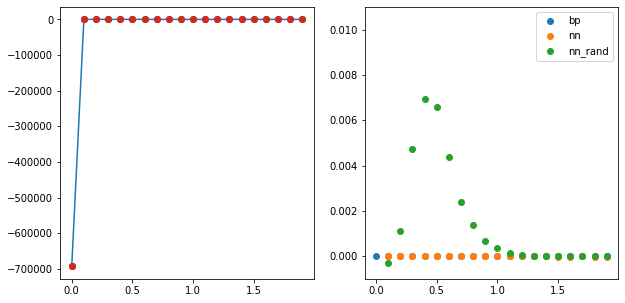

In [10]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.ylim(-0.001,0.011)
plt.show()

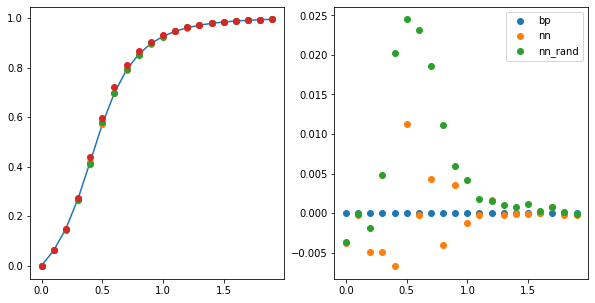

In [11]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.show()

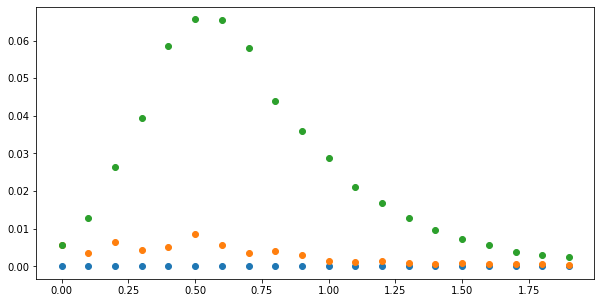

In [12]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.show()

In [15]:
res_ex["betas"]

array([1.000000e-06, 1.000010e-01, 2.000010e-01, 3.000010e-01,
       4.000010e-01, 5.000010e-01, 6.000010e-01, 7.000010e-01,
       8.000010e-01, 9.000010e-01, 1.000001e+00, 1.100001e+00,
       1.200001e+00, 1.300001e+00, 1.400001e+00, 1.500001e+00,
       1.600001e+00, 1.700001e+00, 1.800001e+00, 1.900001e+00])

In [17]:
res_ex["M_i"][5]

array([0.72504037, 0.75453433, 0.70919487, 0.59350144, 0.64890101,
       0.59632523, 0.55128796, 0.49477803, 0.44400976, 0.62481854,
       0.45908696, 0.40091835, 0.41663615])

In [18]:
res_bp["M_i"][5]

array([0.72504037, 0.75453432, 0.70919487, 0.59350144, 0.64890101,
       0.59632523, 0.55128796, 0.49477803, 0.44400976, 0.62481854,
       0.45908695, 0.40091835, 0.41663615])

In [19]:
res_nn["M_i"][5]

array([0.7396, 0.7628, 0.725 , 0.6106, 0.6458, 0.5918, 0.546 , 0.5224,
       0.4648, 0.6458, 0.4742, 0.4172, 0.4196], dtype=float32)

In [20]:
res_nn_rand["M_i"][5]

array([0.7762, 0.7676, 0.497 , 0.5522, 0.4406, 0.6508, 0.6414, 0.5376,
       0.458 , 0.5896, 0.7726, 0.413 , 0.6408], dtype=float32)

In [31]:
swaps

[[5, 9], [4, 12], [2, 10], [3, 6]]

In [35]:
M_i_rand = res_nn_rand["M_i"][5].copy()
for w in swaps:
    #rev = list(reversed(w))
    M_i_rand[w[1]] = res_nn_rand["M_i"][5][w[0]]
    M_i_rand[w[0]] = res_nn_rand["M_i"][5][w[1]]

In [36]:
M_i_rand

array([0.7762, 0.7676, 0.7726, 0.6414, 0.6408, 0.5896, 0.5522, 0.5376,
       0.458 , 0.6508, 0.497 , 0.413 , 0.4406], dtype=float32)

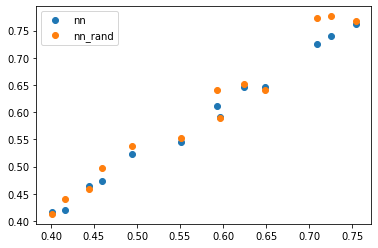

In [39]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][5], res_nn["M_i"][5], "o", label="nn")
plt.plot(res_ex["M_i"][5], M_i_rand,"o", label="nn_rand")
plt.legend()
plt.show()